In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
    mean_squared_log_error, median_absolute_error, r2_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
pd.set_option(
    'display.float_format',
    lambda x: '%.5f' % x
)

In [3]:
FEATURE_VECTOR = [# 'query_num_of_columns',
#                   'query_num_of_rows',
#                   'query_row_column_ratio',
#                   'query_max_skewness',
#                   'query_max_kurtosis',
#                   'query_max_unique',
#                   'candidate_num_of_columns',
#                   'candidate_num_rows',
#                   'candidate_row_column_ratio',
#                   'candidate_max_skewness',
#                   'candidate_max_kurtosis',
#                   'candidate_max_unique',
#                   'query_target_max_pearson',
#                   'query_target_max_spearman',
#                   'query_target_max_covariance',
#                   'query_target_max_mutual_info',
                  'candidate_target_max_pearson',
                  'candidate_target_max_spearman',
#                   'candidate_target_max_covariance',
#                   'candidate_target_max_mutual_info',
#                   'max_pearson_difference',
                  'containment_fraction']
RELATIVE_GAIN_COLUMN_NAME = 'gain_in_r2_score'
SCORE_BEFORE_COLUMN_NAME = 'r2_score_before'
SCORE_AFTER_COLUMN_NAME = 'r2_score_after'
ABSOLUTE_GAIN_COLUMN_NAME = 'absolute_gain_r2'

In [4]:
def fit_tsne(alpha, training_filename, feature_vector, target_column, use_sample=True, sample=2000):
    """This functions builds a classifier based on the training data.
    """
    
    training_data = pd.read_csv(training_filename).sample(n=sample) if use_sample else pd.read_csv(training_filename)
    training_data['class'] = ['gain' if row[target_column] > alpha else 'loss'
                              for index, row in training_data.iterrows()]
    X_train = training_data[feature_vector]
    y_train = training_data['class']
    
    clf = TSNE(n_components=2,perplexity=100)
    Y_pred = clf.fit_transform(X_train)
    return Y_pred.T, y_train


In [5]:
Y_pred_training, y_train_training = fit_tsne(
    alpha=0,
    training_filename='../data/training-for-model.csv',
    feature_vector=FEATURE_VECTOR,
    target_column=RELATIVE_GAIN_COLUMN_NAME
)

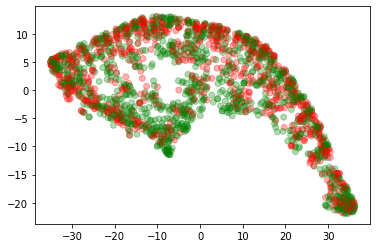

In [8]:
colors = np.array(['green' if x=='gain' else 'red' for x in y_train_training])
plt.scatter(Y_pred_training[0], Y_pred_training[1], c=colors, alpha=0.3)
plt.show()

In [9]:
Y_pred_college, y_train_college = fit_tsne(
    alpha=0,
    training_filename='college-debt-records-features-single-column-w-class',
    feature_vector=FEATURE_VECTOR,
    target_column=RELATIVE_GAIN_COLUMN_NAME,
    use_sample=False
)

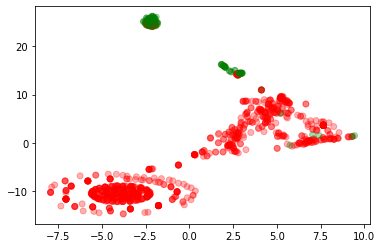

In [10]:
colors = np.array(['green' if x=='gain' else 'red' for x in y_train_college])
plt.scatter(Y_pred_college[0], Y_pred_college[1], c=colors, alpha=0.3)
plt.show()